In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy
import pandas
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression


In [25]:
def train_test_split_group(group_column, *arrays, **kw_args):
   
    from sklearn import cross_validation
    allow_none = kw_args.pop('allow_none', None)

    assert len(arrays) > 0, "at least one array should be passed"
    length = len(arrays[0])
    for array in arrays:
        assert len(array) == length, "different size"

    initial_data = numpy.array(group_column)
    assert len(initial_data) == length, "group column must have the same length"
    group_ids = numpy.unique(initial_data)

    train_indices, test_indices = cross_validation.train_test_split(group_ids, **kw_args)
    train_indices = numpy.in1d(initial_data, train_indices)
    test_indices = numpy.in1d(initial_data, test_indices)

    result = []
    for array in arrays:
        if isinstance(array, pandas.DataFrame):
            result.append(array.iloc[train_indices, :])
            result.append(array.iloc[test_indices, :])
        elif (array is None) and allow_none:
            # specially for checking weights
            result.append(None)
            result.append(None)
        else:
            result.append(numpy.array(array)[train_indices])
            result.append(numpy.array(array)[test_indices])
    return result

In [26]:
data = pd.read_csv("training.csv", sep=",")

In [27]:
data.head()

,EventID,Label,Mass,Corrected_mass,Pt,Pt_sum,Pt_min,IP_chi2,IP_chi2_sum,Flight_distance,Pseudorapidity,Track_number_PV,Tracks_number,Tracks_number_passed,Vertex_chi2,Weight
0,0,1,3440.680014,5202.580014,15583.900014,15793.800014,6499.170014,23.863914,281.409014,727.555014,2.581344,0,2,2,1.119164,2.834853
1,0,1,1319.829991,2465.479991,3477.259991,3593.409991,404.050991,34.731791,135.844991,165.981991,2.581401,0,2,1,0.004716,2.834853
2,0,1,2732.810016,5804.080016,9356.570016,9562.870016,406.027016,150.119016,348.274016,414.395016,2.579956,0,2,1,0.016452,2.834853
3,0,1,1674.579998,4423.859998,6889.459998,6981.049998,404.992998,84.545298,167.266998,167.871998,2.585178,0,2,1,0.085944,2.834853
4,0,1,1844.839993,5744.339993,12385.899993,12299.399993,3167.219993,110.864993,251.260993,350.210993,2.590683,0,2,2,1.167173,2.834853


In [28]:
data.shape

(498412, 16)

In [29]:
data["Label"].sum()

484879

In [30]:
y = data['Label']

In [31]:
data.drop(["Label", "EventID", "Weight"], axis=1, inplace=True)

In [32]:
x = data

In [33]:
x.head()

,Mass,Corrected_mass,Pt,Pt_sum,Pt_min,IP_chi2,IP_chi2_sum,Flight_distance,Pseudorapidity,Track_number_PV,Tracks_number,Tracks_number_passed,Vertex_chi2
0,3440.680014,5202.580014,15583.900014,15793.800014,6499.170014,23.863914,281.409014,727.555014,2.581344,0,2,2,1.119164
1,1319.829991,2465.479991,3477.259991,3593.409991,404.050991,34.731791,135.844991,165.981991,2.581401,0,2,1,0.004716
2,2732.810016,5804.080016,9356.570016,9562.870016,406.027016,150.119016,348.274016,414.395016,2.579956,0,2,1,0.016452
3,1674.579998,4423.859998,6889.459998,6981.049998,404.992998,84.545298,167.266998,167.871998,2.585178,0,2,1,0.085944
4,1844.839993,5744.339993,12385.899993,12299.399993,3167.219993,110.864993,251.260993,350.210993,2.590683,0,2,2,1.167173


Заготовки для дальнейшего обучения

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [35]:
#classifier = RandomForestClassifier(n_estimators=100, max_depth=6)
#classifier.fit(x_train, y_train)

#predicted = classifier.predict_proba(x_test)[:, 1]

In [36]:
#roc_auc_score(y_test, predicted)

In [37]:
#fpr, tpr, _ = roc_curve(y_test, predicted)

In [38]:
"""plt.figure()
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.5f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 0.2])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()"""

'plt.figure()\nlw = 2\nplt.plot(fpr, tpr, color=\'orange\',\n         lw=lw, label=\'ROC curve (area = %0.5f)\' % auc(fpr,tpr))\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=lw, linestyle=\'--\')\nplt.xlim([0.0, 0.2])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.legend(loc="lower right")\nplt.grid()\nplt.show()'

In [39]:
#logreg = LogisticRegression()
#logreg.fit(x_train, y_train)

#predicted = logreg.predict_proba(x_test)
   #roc_auc_score(y_test, predicted)

In [40]:
#predicted

In [41]:
#fpr, tpr, _ = roc_curve(y_test, predicted[:, 1])

In [42]:
"""plt.figure()
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.5f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 0.2])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()"""

'plt.figure()\nlw = 2\nplt.plot(fpr, tpr, color=\'orange\',\n         lw=lw, label=\'ROC curve (area = %0.5f)\' % auc(fpr,tpr))\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=lw, linestyle=\'--\')\nplt.xlim([0.0, 0.2])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.legend(loc="lower right")\nplt.grid()\nplt.show()'

In [43]:
gbclassifier = GradientBoostingClassifier(max_depth=6)
gbclassifier.fit(x_train, y_train)

predicted = gbclassifier.predict_proba(x_test)

In [44]:
fpr, tpr, _ = roc_curve(y_test, predicted[:, 1])

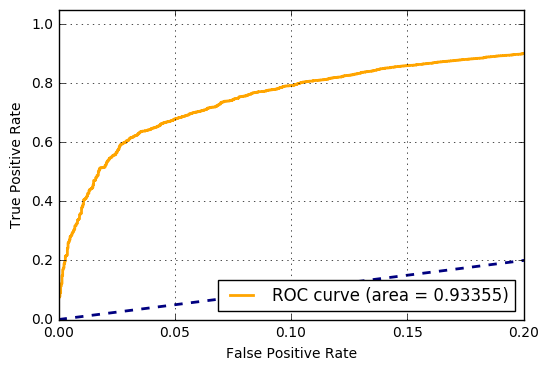

In [45]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.5f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 0.2])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [46]:
features = list(set(data.columns))
features

['Mass',
 'Vertex_chi2',
 'IP_chi2_sum',
 'Pt',
 'Flight_distance',
 'Track_number_PV',
 'Pt_min',
 'Pseudorapidity',
 'Tracks_number',
 'Corrected_mass',
 'Tracks_number_passed',
 'IP_chi2',
 'Pt_sum']

In [47]:
data1 = pd.read_csv("training.csv", sep=",")

Содержательная часть

In [48]:
training_data, validation_data = train_test_split_group(data1.EventID, data1, random_state=11, train_size=0.66)

In [49]:
def compute_mean(event_ids, values):
    number_of_sv_in_event = np.bincount(event_ids)
    return np.bincount(event_ids, weights=values) / number_of_sv_in_event

In [50]:
def compute_max(event_ids, values):
    max_values = numpy.zeros(numpy.amax(event_ids)+1)
    for i in range(len(event_ids)):
        if values[i] > max_values[event_ids[i]]:
            max_values[event_ids[i]] = values[i]
    max_values[max_values == 0] = numpy.nan
    return max_values

Градиентный бустинг со стандартными параметрами, сравнение max и mean для предсказаний

In [51]:
gbclassifier = GradientBoostingClassifier(max_depth=6)
gbclassifier.fit(training_data[features], training_data.Label)

#predicted = gbclassifier.predict_proba(x_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [52]:
# predict each SV
proba = gbclassifier.predict_proba(validation_data[features])
events_ids = np.unique(validation_data.EventID)

# compute number of SVs in each event
number_of_sv_in_event = np.bincount(validation_data.EventID)

# compute predictions for events (take the mean value of predictions for SVs forming an event)
events_proba = compute_mean(validation_data.EventID, proba[:, 1])[events_ids]

# compute weights for events 
events_weights = compute_mean(validation_data.EventID, validation_data.Weight)[events_ids]

# compute labels for events 
events_labels = compute_mean(validation_data.EventID, validation_data.Label)[events_ids]

C:\Users\igosh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [53]:
roc_auc_score(events_labels, events_proba, sample_weight=events_weights)

0.94699496004218886

In [54]:
fpr, tpr, _ = roc_curve(events_labels, events_proba, sample_weight=events_weights)

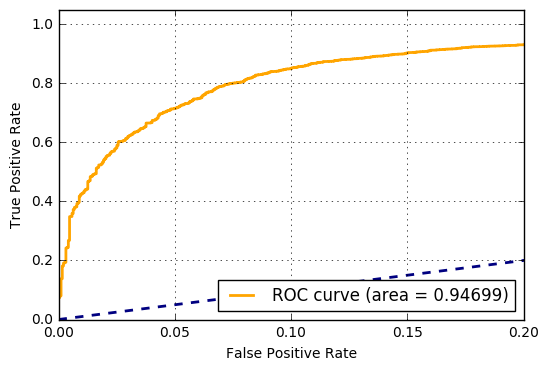

In [55]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.5f)' % roc_auc_score(events_labels, events_proba, sample_weight=events_weights))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 0.2])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [56]:
# predict each SV
proba = gbclassifier.predict_proba(validation_data[features])
events_ids = np.unique(validation_data.EventID)

# compute number of SVs in each event
number_of_sv_in_event = np.bincount(validation_data.EventID)

# compute predictions for events (take the mean value of predictions for SVs forming an event)
events_proba = compute_max(numpy.array(validation_data.EventID), proba[:, 1])[events_ids]

# compute weights for events 
events_weights = compute_mean(validation_data.EventID, validation_data.Weight)[events_ids]

# compute labels for events 
events_labels = compute_mean(validation_data.EventID, validation_data.Label)[events_ids]

C:\Users\igosh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [57]:
roc_auc_score(events_labels, events_proba, sample_weight=events_weights)

0.96109347552359647

In [58]:
fpr, tpr, _ = roc_curve(events_labels, events_proba, sample_weight=events_weights)

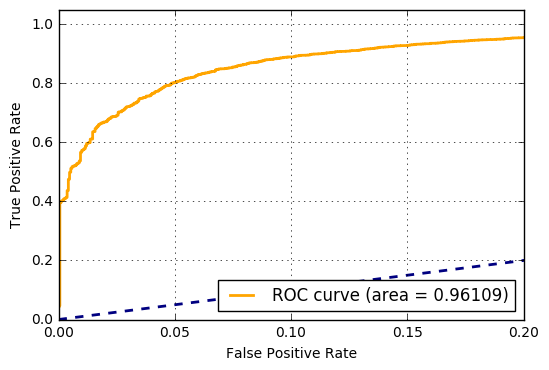

In [59]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.5f)' % roc_auc_score(events_labels, events_proba, sample_weight=events_weights))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 0.2])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Тюнинг параметров в различных классификаторах.

In [62]:
from sklearn.grid_search import GridSearchCV

C:\Users\igosh\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [41]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6],
              #'min_samples_leaf': [3, 5, 9, 17],
              #'max_features': [1.0, 0.3, 0.1]
              }

gbclassifier = GradientBoostingClassifier(n_estimators=100)


gs_cv = GridSearchCV(gbclassifier, param_grid, n_jobs=4).fit(training_data[features], training_data.Label)


gs_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 6}

In [60]:
from sklearn.ensemble import AdaBoostClassifier

In [63]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'algorithm': ['SAMME', 'SAMME.R'],
              'n_estimators': [50, 100]
              }

abclassifier = AdaBoostClassifier()


gs_cv = GridSearchCV(abclassifier, param_grid, n_jobs=4).fit(training_data[features], training_data.Label)


gs_cv.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}

In [64]:
gbclassifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=6)
gbclassifier.fit(training_data[features], training_data.Label)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [65]:
abclassifier = AdaBoostClassifier(n_estimators=100, algorithm="SAMME.R", learning_rate=0.1)
abclassifier.fit(training_data[features], training_data.Label)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=100, random_state=None)

In [68]:
# predict each SV
proba = gbclassifier.predict_proba(validation_data[features])
events_ids = np.unique(validation_data.EventID)

# compute number of SVs in each event
number_of_sv_in_event = np.bincount(validation_data.EventID)

# compute predictions for events (take the mean value of predictions for SVs forming an event)
events_proba = compute_max(numpy.array(validation_data.EventID), proba[:, 1])[events_ids]

# compute weights for events 
events_weights = compute_mean(validation_data.EventID, validation_data.Weight)[events_ids]

# compute labels for events 
events_labels = compute_mean(validation_data.EventID, validation_data.Label)[events_ids]

roc_auc_score(events_labels, events_proba, sample_weight=events_weights)

C:\Users\igosh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


0.96015632511603866

In [69]:
# predict each SV
proba = abclassifier.predict_proba(validation_data[features])
events_ids = np.unique(validation_data.EventID)

# compute number of SVs in each event
number_of_sv_in_event = np.bincount(validation_data.EventID)

# compute predictions for events (take the mean value of predictions for SVs forming an event)
events_proba = compute_max(numpy.array(validation_data.EventID), proba[:, 1])[events_ids]

# compute weights for events 
events_weights = compute_mean(validation_data.EventID, validation_data.Weight)[events_ids]

# compute labels for events 
events_labels = compute_mean(validation_data.EventID, validation_data.Label)[events_ids]

roc_auc_score(events_labels, events_proba, sample_weight=events_weights)

C:\Users\igosh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


0.94921058452023188